In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import autograd
import torch.nn.functional as F

In [7]:
# load the images and labels
images = np.load("./images.npy").copy().astype(np.float32)
labels = np.load("./labels.npy").copy().astype(np.int) # 0:apple 1:baseball 2:cookie 3:clock 4:fan

# prepare some constants
NUM_IMAGES, HEIGHT, WIDTH = images.shape
NUM_CLASSES = len(np.unique(labels))
NUM_OPT_STEPS = 5000 # default, may change in different experiments
NUM_HIDDEN = 100

# transform each image to a [height*width, 1] column vector
X = images.reshape(NUM_IMAGES, HEIGHT * WIDTH) 
Y = labels

# mean normalization on image data (mean = 0.0 and var = 1.0)
mean = X.mean()
s = X.std()
X = (X - mean) / s

# separate training, cross-validation and testing data (40000:5000:5000), all FloatTensors
train_X, cross_X, test_X = X[:40000], X[40000:45000], X[45000:] 
train_Y, cross_Y, test_Y = Y[:40000], Y[40000:45000], Y[45000:]

In [8]:
class TwoLayerNN(torch.nn.Module):
    """
    Customized 2-layer NN, subclassing the nn.Module
    """
    def __init__(self):
        super().__init__()
        self.linear1 = torch.nn.Linear(HEIGHT * WIDTH, NUM_HIDDEN)
        self.linear2 = torch.nn.Linear(NUM_HIDDEN, NUM_CLASSES)
        
    def forward(self, x):
        x = F.relu(self.linear1(x))
        y_hat = self.linear2(x)
        return y_hat
    
model = TwoLayerNN()

In [9]:
def train(batch_size):
    """
    Taking a single optimization step using batch size randomly-chosen examples
    Args: 
        batch_size: int 
    Returns:
        A int, the loss of training for 1 time using [batch_size] examples from training data
    """    
    # model.train() puts our model in train mode, which can require different
    # behavior than eval mode (for example in the case of dropout).
    model.train()
    # i is is a 1-D array with shape [batch_size]
    i = np.random.choice(train_X.shape[0], size=batch_size, replace=False)
    x = autograd.Variable(torch.from_numpy(train_X[i]))
    y = autograd.Variable(torch.from_numpy(train_Y[i]))
    optimizer.zero_grad()
    y_hat_ = model(x)
    loss = F.cross_entropy(y_hat_, y) #.cross_entropy(input, target, weight=None, size_average=True,
                                      #               ignore_index=-100, reduce=True)
                                      # input – Variable (N,C) where C = number of classes
                                      # target – Variable (N) where each value is 0 <= targets[i] <= C-1
    loss.backward()
    optimizer.step()
    return loss.data[0]

In [10]:
def accuracy(y, y_hat):
    """Compute training accuracy.
    Args:
       y: A 1-D int NumPy array.
       y_hat: A 1-D int NumPy array.
    Returns:
       A float, the fraction of time y[i] == y_hat[i].
    """
    return torch.mean((y == y_hat).float())   

In [13]:
def approx_train_accuracy():
    """
    Compute accuracy on random training data
    """
    # for a single batch of size 1000 to compute training accuracy
    random_size = 1000
    # test mode
    model.eval() 
    # i is is a 1-D array with shape [batch_size]
    i = np.random.choice(train_X.shape[0], size=random_size, replace=False)
    x = autograd.Variable(torch.from_numpy(train_X[i])) 
    y = autograd.Variable(torch.from_numpy(train_Y[i]))
    y_hat = model(x) # (1000, NUM_CLASSES)
    y_hat = y_hat.max(dim = 1)[1] # get max on each row, and get the index of that max element
    accu = accuracy(y.data, y_hat.data)
    return accu

In [14]:
def val_accuracy():
    """
    Computes validation accuracy using a 
    single batch and all validation examples.
    """
    model.eval()
    x = autograd.Variable(torch.from_numpy(cross_X))
    y = autograd.Variable(torch.from_numpy(cross_Y))
    y_hat = model(x)
    y_hat = y_hat.max(dim = 1)[1]
    accu = accuracy(y.data, y_hat.data)
    return accu

In [46]:
def plotResult(train_accs, val_accs):
    """
    Plot training accuracy and validation 
    accuracy as a function of optimization step.
    Args:
        train_accs: float list, training accurasy
        val_accs: float list, validation accurasy
    """
    plt.plot(train_accs, 'r-')
    plt.plot(val_accs, 'b-')
    plt.title("training(red) accuracy vs validation(blue) accuracy - step")
    plt.show()

     0  0.15  0.16
   100  0.60  0.62
   200  0.65  0.64
   300  0.68  0.67
   400  0.66  0.67
   500  0.71  0.71
   600  0.66  0.66
   700  0.73  0.72
   800  0.71  0.72
   900  0.66  0.67
  1000  0.70  0.69
  1100  0.74  0.74
  1200  0.72  0.72
  1300  0.71  0.70
  1400  0.73  0.74
  1500  0.73  0.75
  1600  0.74  0.74
  1700  0.69  0.68
  1800  0.73  0.73
  1900  0.72  0.71
  2000  0.71  0.71
  2100  0.77  0.76
  2200  0.75  0.76
  2300  0.76  0.76
  2400  0.74  0.72
  2500  0.70  0.72
  2600  0.72  0.74
  2700  0.74  0.76
  2800  0.77  0.75
  2900  0.75  0.77
  3000  0.78  0.77
  3100  0.75  0.76
  3200  0.73  0.73
  3300  0.74  0.74
  3400  0.78  0.76
  3500  0.77  0.75
  3600  0.80  0.76
  3700  0.77  0.77
  3800  0.78  0.76
  3900  0.76  0.76
  4000  0.77  0.75
  4100  0.78  0.78
  4200  0.79  0.78
  4300  0.77  0.77
  4400  0.75  0.76
  4500  0.79  0.77
  4600  0.76  0.78
  4700  0.78  0.77
  4800  0.78  0.77
  4900  0.76  0.76


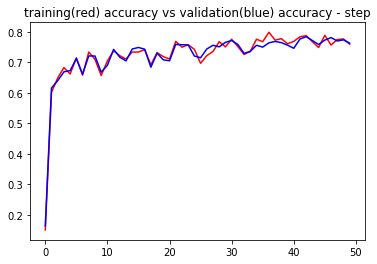

In [88]:
def train_and_predict(batch_size=1, num_steps=NUM_OPT_STEPS, 
                      opt=torch.optim.SGD, learning_rate=1e-3,
                      show_loss=True, show_curve=True):
    """
    Train the model 
    Args:
        batch_size: batch_size of traiing data in each training step, default=1;
        num_steps: number of training times, defult=5000;
        opt: optimizer, default is SGD;
        lr: learning rate, default=0.001;
        show_loss: if print the loss during training;
        show_curve: if plot the training/validation accuracy curve at the end;
    """
    optimizer = opt(model.parameters(), lr=learning_rate)
    
    train_accs, val_accs = [], [] # clear the previous results
    for i in range(num_steps):
        train(batch_size)
        if i % 100 == 0:
            train_accs.append(approx_train_accuracy())
            val_accs.append(val_accuracy())
            if show_loss:
                print("%6d %5.2f %5.2f" % (i, train_accs[-1], val_accs[-1]))
    if show_curve:
        plotResult(train_accs, val_accs)
    return train_accs, val_accs
    
# Train this network for 5,000 steps using a batch size of 1, 
# using Adam as the optimizer with a learning rate of 0.001.
_, _ = train_and_predict(batch_size=1, num_steps=5000, opt=torch.optim.Adam, 
                  learning_rate=0.001, show_loss=True, show_curve=True)

In [87]:
# Reset the parameters of the model
for m in model.children():
    m.reset_parameters()

     0  0.23  0.21
   100  0.76  0.73
   200  0.77  0.76
   300  0.75  0.74
   400  0.75  0.76
   500  0.81  0.78
   600  0.79  0.79
   700  0.78  0.79
   800  0.80  0.79
   900  0.80  0.80
  1000  0.81  0.80
  1100  0.83  0.81
  1200  0.80  0.80
  1300  0.81  0.81
  1400  0.83  0.82
  1500  0.84  0.81
  1600  0.83  0.82
  1700  0.84  0.82
  1800  0.82  0.82
  1900  0.86  0.82
  2000  0.82  0.81
  2100  0.85  0.82
  2200  0.83  0.83
  2300  0.83  0.80
  2400  0.84  0.83
  2500  0.84  0.82
  2600  0.85  0.82
  2700  0.85  0.84
  2800  0.86  0.83
  2900  0.84  0.83
  3000  0.87  0.84
  3100  0.86  0.83
  3200  0.85  0.84
  3300  0.84  0.84
  3400  0.86  0.83
  3500  0.86  0.83
  3600  0.86  0.84
  3700  0.85  0.83
  3800  0.85  0.84
  3900  0.87  0.83
  4000  0.84  0.84
  4100  0.85  0.84
  4200  0.86  0.84
  4300  0.85  0.84
  4400  0.86  0.84
  4500  0.87  0.83
  4600  0.85  0.85
  4700  0.86  0.84
  4800  0.86  0.84
  4900  0.86  0.85


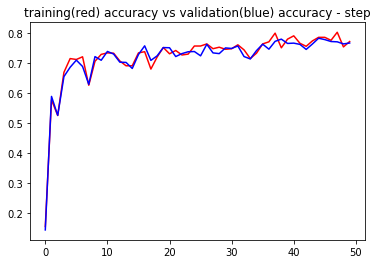

In [37]:
# Retrain the network for 5,000 steps 
# using a batch size of 10, using Adam as the optimizer 
# with a learning rate of 0.001.
train_and_predict(batch_size=10, num_steps=5000, opt=torch.optim.Adam, learning_rate=0.001, 
                  show_loss=True, show_curve=True)

### Experiment on different batch sizes

size= 10
size= 20
size= 30
size= 40
size= 50
size= 60
size= 70
size= 80
size= 90
size= 100
size= 110
size= 120
size= 130
size= 140


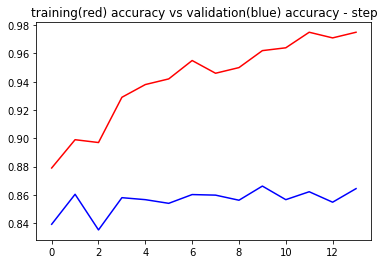

In [73]:
# result sets
all_train_accu = []
all_valid_accu = []

for size in range(10, 150, 10):
    print("size=", size)
    # clear param cache
    for m in model.children():
        m.reset_parameters()
        
    # train the model with diff batch sizes
    train_accs, val_accs = train_and_predict(batch_size=size, num_steps=5000, opt=torch.optim.Adam, 
                                            learning_rate=0.001, show_loss=False, show_curve=False)
    
    # get the last training and validation accuracy
    all_train_accu.append(train_accs[-1])
    all_valid_accu.append(val_accs[-1])

# plot the training and validation acuracy w.r.t different batch sizes
plt.plot(all_train_accu, 'r-')
plt.plot(all_valid_accu, 'b-')
plt.title("training(red) accuracy vs validation(blue) accuracy - step")
plt.show()

#### Findings:
We can see that by increasing only the batch size, accuracy on validation dataset do not increase further after size 40, but training accuracy keeps climbing. This indicates after (for current training settings) batch size should not be larger than 40 otherwise variance will increase (model gets more prone to overfitting).

### Experiment on different learning rate

lr= 0.01
lr= 0.015
lr= 0.022
lr= 0.033
lr= 0.05
lr= 0.075
lr= 0.112
lr= 0.168
lr= 0.252
lr= 0.378
lr= 0.567
lr= 0.85


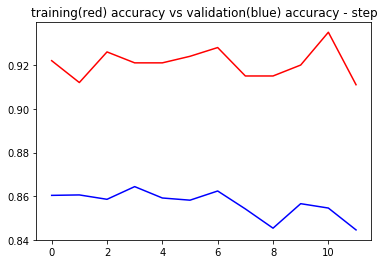

In [79]:
# result sets
all_train_accu = []
all_valid_accu = []

rate = 0.01
while(rate <= 1):
    print("lr=", rate)
    
    # clear param cache
    for m in model.children():
        m.reset_parameters()
        
    # train the model with diff batch sizes
    train_accs, val_accs = train_and_predict(batch_size=40, num_steps=5000, opt=torch.optim.Adam, 
                                            learning_rate=rate, show_loss=False, show_curve=False)
    
    # get the last training and validation accuracy
    all_train_accu.append(train_accs[-1])
    all_valid_accu.append(val_accs[-1])
    
    # lr inrease by 2 times
    rate = round(rate * 1.5, 3)
    
# plot the training and validation acuracy w.r.t different batch sizes
plt.plot(all_train_accu, 'r-')
plt.plot(all_valid_accu, 'b-')
plt.title("training(red) accuracy vs validation(blue) accuracy - step")
plt.show()

#### Findings:
We can see that when learning rate increase and approches to 1, the validation accuracy drops. This indicates the learning rate is too large so the step taken became too big for the model, thus it did not converge to minimum. An acceptable range of learning rate from this experiment is between 0.01 and 0.05.

### Experiment on different number of steps

step= 100
step= 150
step= 225
step= 337
step= 505
step= 757
step= 1135
step= 1702
step= 2553
step= 3829
step= 5743
step= 8614


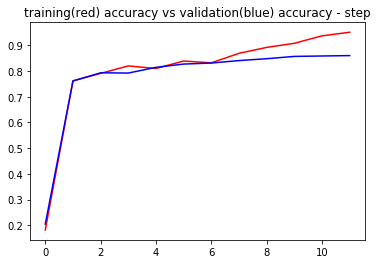

In [82]:
# result sets
all_train_accu = []
all_valid_accu = []

step = 100
while(step <= 10000):
    print("step=", step)
    
    # clear param cache
    for m in model.children():
        m.reset_parameters()
        
    # train the model with diff batch sizes
    train_accs, val_accs = train_and_predict(batch_size=40, num_steps=step, opt=torch.optim.Adam, 
                                            learning_rate=0.05, show_loss=False, show_curve=False)
    
    # get the last training and validation accuracy
    all_train_accu.append(train_accs[-1])
    all_valid_accu.append(val_accs[-1])
    
    # lr inrease by 2 times
    step = int(step * 1.5)
    
# plot the training and validation acuracy w.r.t different batch sizes
plt.plot(all_train_accu, 'r-')
plt.plot(all_valid_accu, 'b-')
plt.title("training(red) accuracy vs validation(blue) accuracy - step")
plt.show()

#### Findings:
We can see that before step=1135, the training and validation accuracy increase together. After that threshold, overfitting became more and more serious, while the validation accuracy only improves very little. After step 3829 the validation accuracy seems to converge.

**Q: What is the best validation accuracy you could achieve? What was the corresponding batch size and learning rate? How many optimization steps did you need to take to reach that accuracy? How long did training take?**

A:  As shown below, the best validation accuracy (with the Adam optimizer) was 86%. The selected batch size was 40, learning rate was 0.05, number of steps was 4000. Total training time is approximately 13 seconds.

     0  0.22  0.22
   100  0.79  0.77
   200  0.78  0.78
   300  0.82  0.80
   400  0.82  0.81
   500  0.84  0.82
   600  0.83  0.82
   700  0.83  0.82
   800  0.83  0.82
   900  0.84  0.82
  1000  0.84  0.83
  1100  0.84  0.83
  1200  0.87  0.84
  1300  0.86  0.84
  1400  0.88  0.84
  1500  0.85  0.84
  1600  0.88  0.84
  1700  0.86  0.84
  1800  0.87  0.83
  1900  0.88  0.84
  2000  0.89  0.85
  2100  0.88  0.84
  2200  0.89  0.85
  2300  0.90  0.85
  2400  0.88  0.85
  2500  0.87  0.85
  2600  0.89  0.85
  2700  0.89  0.85
  2800  0.89  0.85
  2900  0.91  0.85
  3000  0.90  0.86
  3100  0.89  0.85
  3200  0.90  0.85
  3300  0.90  0.86
  3400  0.91  0.86
  3500  0.90  0.86
  3600  0.91  0.86
  3700  0.91  0.85
  3800  0.91  0.85
  3900  0.90  0.86


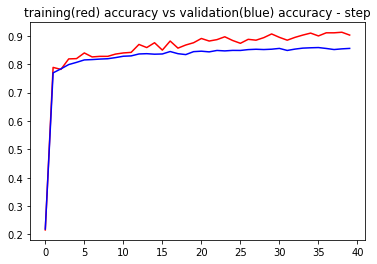

training running time is:  0:00:12.985094


In [91]:
# Reset the parameters of the model
for m in model.children():
    m.reset_parameters()

# to track running time
import datetime
time_start = datetime.datetime.now()

# train the model from begining with selected params
_, _ = train_and_predict(batch_size=40, num_steps=4000, opt=torch.optim.Adam, 
                  learning_rate=0.05, show_loss=True, show_curve=True)

time_end = datetime.datetime.now()
print("training running time is: ", time_end - time_start)